In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
# Load the Lending Club data set
df = pd.read_csv('lendingclub/accepted_2007_to_2018Q4.csv')

In [9]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.00,20000.00,20000.00,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.00,35000.00,35000.00,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Read in the descriptions of each column
dict_col = pd.read_excel('LCDataDictionary.xlsx')

In [5]:
dict_col = dict_col[['LoanStatNew','Description']]

In [6]:
dict_col = dict_col.rename({'LoanStatNew': 'Name'}, axis=1)

In [8]:
dict_col

,Name,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...
150,settlement_term,The number of months that the borrower will be...
151,NaN,NaN


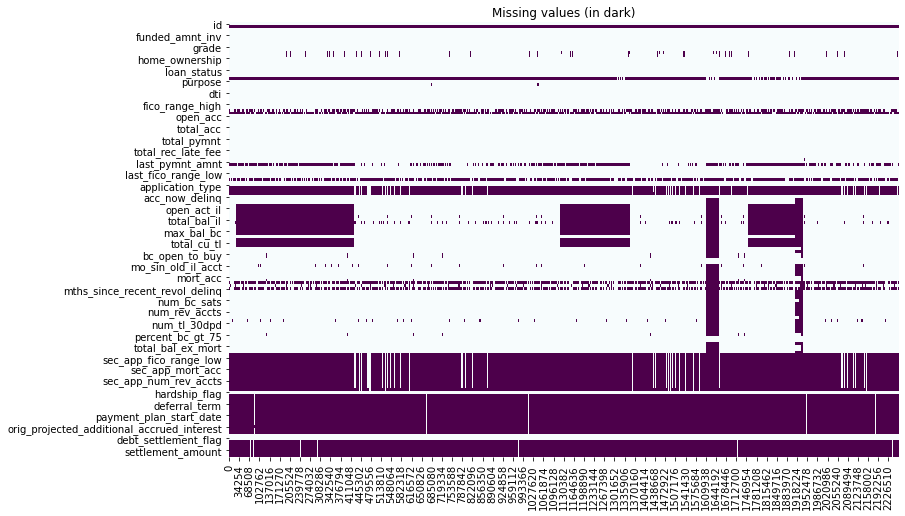

In [10]:
# Visualize the missing values across all columns
ax = sns.heatmap(df.isnull().T, cmap = "BuPu", cbar=False)
ax.set_title('Missing values (in dark)')

In [11]:
# Observe the distribution of our target variable
df["loan_status"].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Counts of each loan status')

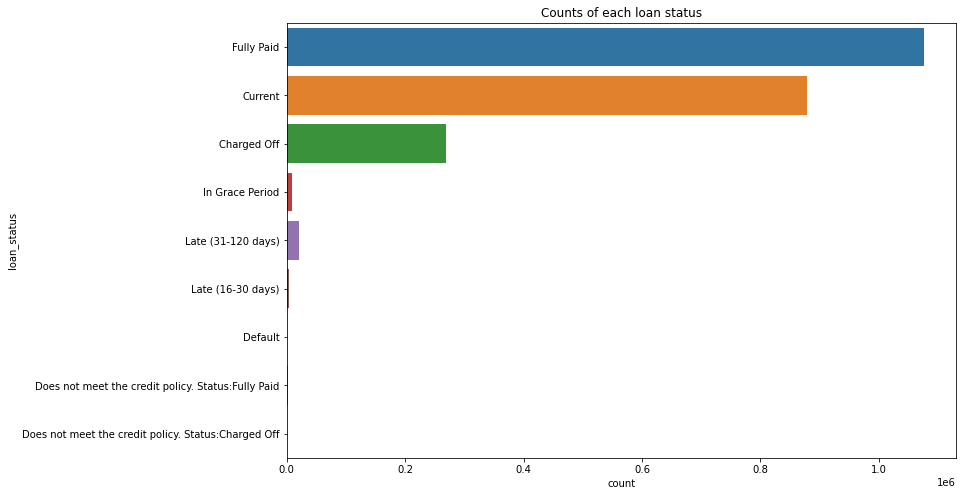

In [12]:
# Visualize it
ax = sns.countplot(y="loan_status", data=df)
ax.set_title('Counts of each loan status')

In [13]:
# Select only Fully Paid and Charged Off as 1 and 0
df1 = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] =='Charged Off')]
df1['loan_status'] = df1['loan_status'].map({'Fully Paid': 1., 'Charged Off': 0.})

In [17]:
# Calculate missing value percentage for each column
missperc = (df1.isna().sum() / df1.shape[0]).reset_index()

In [19]:
# Filter for columns with less than 50% missing values
cols = missperc[missperc[0] < 0.5]['index']

In [24]:
# Filter the dataframe based on those columns
df2 = df1[cols]

In [25]:
df2.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,...,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,N,Cash,N
1,68355089,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,...,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,N,Cash,N
2,68341763,20000.00,20000.00,20000.00,60 months,10.78,432.66,B,B4,truck driver,...,50.00,0.00,0.00,218418.00,18696.00,6200.00,14877.00,N,Cash,N
4,68476807,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.00,0.00,0.00,439570.00,95768.00,20300.00,88097.00,N,Cash,N
5,68426831,11950.00,11950.00,11950.00,36 months,13.44,405.18,C,C3,Veterinary Tecnician,...,100.00,0.00,0.00,16900.00,12798.00,9400.00,4000.00,N,Cash,N


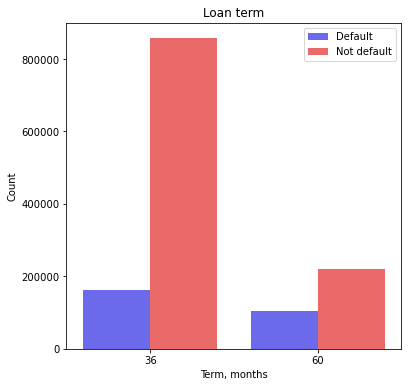

In [26]:
# Visualize the distribution of the target variable across different loan terms
df2['term'].value_counts()
df2['term'] = df2['term'].str.replace(r'\D', '').astype(int)

fig, ax1 = plt.subplots(figsize=(6,6))
sns.countplot(data=df2, x='term', ax=ax1, hue = 'loan_status', palette='seismic')
ax1.set_ylabel('Count')
ax1.set_xlabel('Term, months')
ax1.set_title('Loan term');
ax1.legend(['Default', 'Not default'])

In [29]:
# Investigate the correlation between variables
corrl = df2.corr()

In [39]:
# List the correlation absolute value between dependent and independent variables
corrl['loan_status'].abs().sort_values(ascending=False)[:20]

loan_status               1.00
last_fico_range_high      0.67
last_fico_range_low       0.58
recoveries                0.51
collection_recovery_fee   0.48
total_rec_prncp           0.44
last_pymnt_amnt           0.35
total_pymnt               0.32
total_pymnt_inv           0.31
int_rate                  0.26
term                      0.18
total_rec_late_fee        0.14
fico_range_low            0.13
fico_range_high           0.13
acc_open_past_24mths      0.10
num_tl_op_past_12m        0.09
dti                       0.08
bc_open_to_buy            0.08
avg_cur_bal               0.08
tot_hi_cred_lim           0.08
Name: loan_status, dtype: float64

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

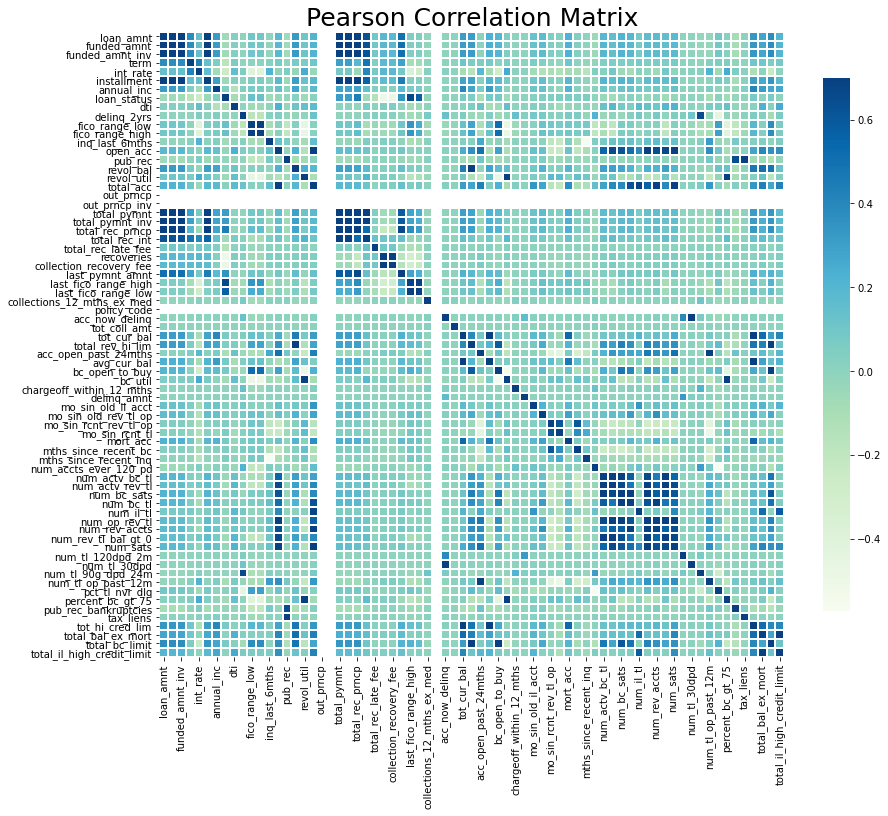

In [40]:
# plot a heatmap to see correlation between all variables
plt.figure(figsize=(14,14))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(corrl,linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w', 
            annot=False, annot_kws={"size":10}, cbar_kws={"shrink": .7})

Text(0.5, 1.0, 'Loan Amount Distribution')

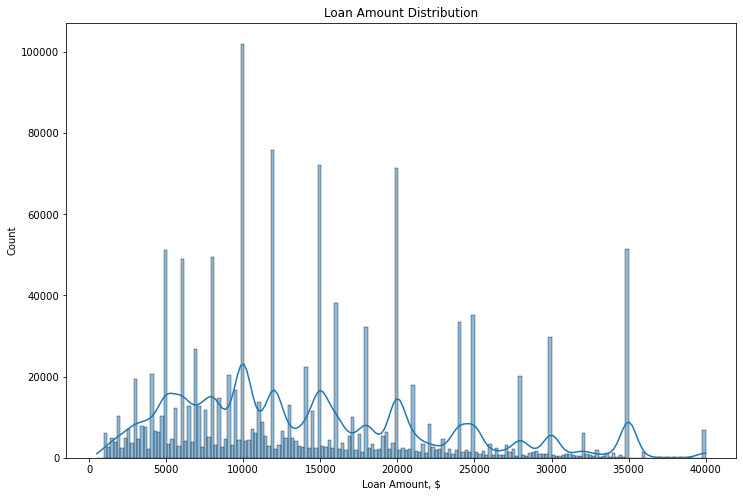

In [41]:
# Histgram on loan amount 
sns.histplot(df2['loan_amnt'], kde=True)
plt.xlabel('Loan Amount, $')
plt.title('Loan Amount Distribution')

Text(0.5, 1.0, 'Loan Amount and Loan Status')

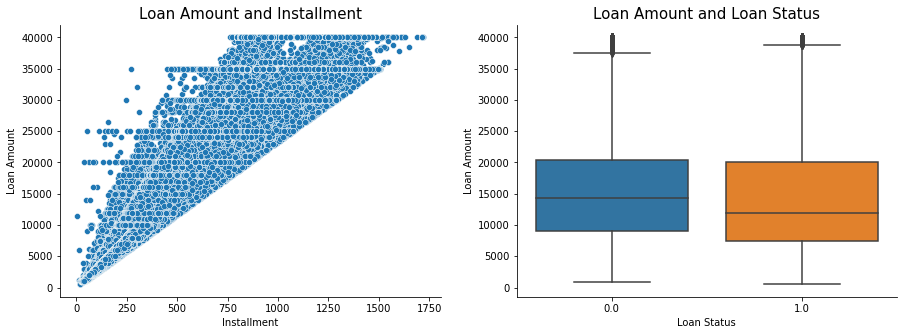

In [42]:
# Side by side plot for loan amount, installment, and loan status
_, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot('installment','loan_amnt', data=df2, ax=axes[0])
sns.boxplot('loan_status','loan_amnt', data=df2, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Installment', ylabel='Loan Amount')
axes[0].set_title('Loan Amount and Installment', size=15)
axes[1].set(xlabel='Loan Status', ylabel='Loan Amount')
axes[1].set_title('Loan Amount and Loan Status', size=15)

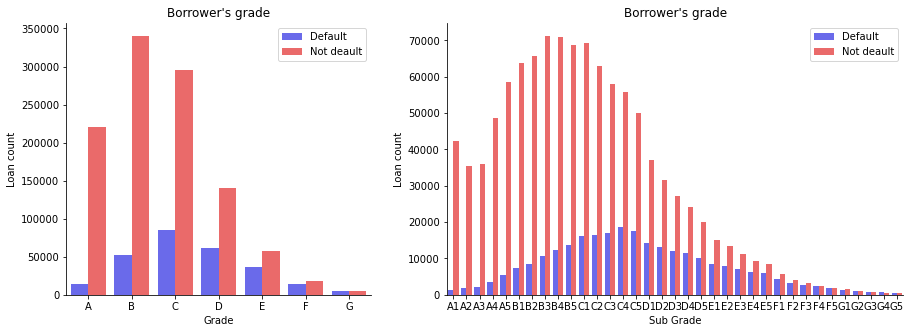

In [43]:
# side by side plot of loan grades and loan status counts
_, axes = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={'width_ratios': [2, 3]})
sns.countplot(x = 'grade', hue = 'loan_status', data=df2, order=sorted(df2['grade'].unique()), palette='seismic', ax=axes[0])
sns.countplot(x = 'sub_grade', hue = 'loan_status', data=df2, palette='seismic', order=sorted(df2['sub_grade'].unique()), ax=axes[1])
sns.despine();
axes[0].set(xlabel = 'Grade', ylabel = 'Loan count');
axes[0].set_title("Borrower's grade");
axes[0].legend(['Default', "Not deault"])
axes[1].set(xlabel = 'Sub Grade', ylabel = 'Loan count');
axes[1].set_title("Borrower's grade");
axes[1].legend(['Default', "Not deault"], loc='upper right');

Text(0.5, 1.0, 'Purpose of the loan')

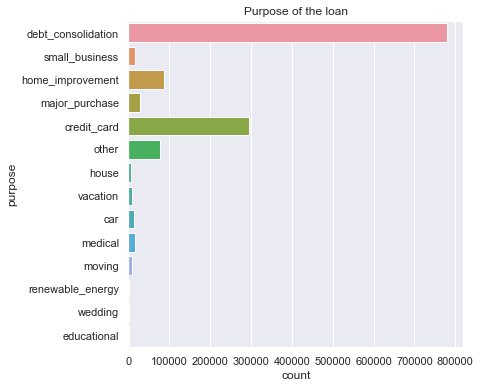

In [44]:
# Purposes of the loan count plot
sns.set_theme(style="darkgrid");
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.countplot(y="purpose", data=df2)
ax.set_title('Purpose of the loan')

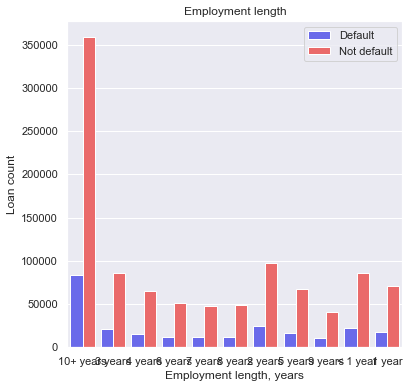

In [45]:
# Employment length vs loan status
fig, ax1 = plt.subplots(figsize=(6,6))
sns.countplot(data=df2, x='emp_length', ax=ax1, hue = 'loan_status', palette='seismic')
ax1.set_ylabel('Loan count')
ax1.set_xlabel('Employment length, years')
ax1.set_title('Employment length');
ax1.legend(['Default', 'Not default'])

Text(0.5, 1.0, 'Home ownership')

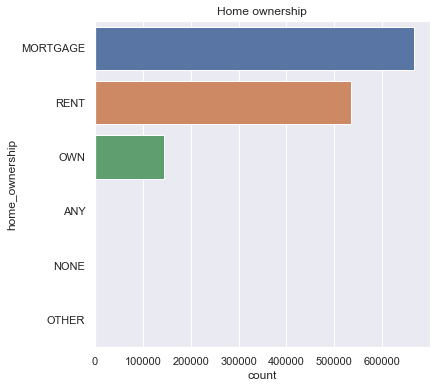

In [47]:
# Visualize the counts of home ownership
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.countplot(y="home_ownership", data=df2)
ax.set_title('Home ownership')

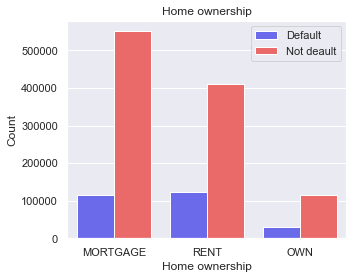

In [48]:
# Loan status across home ownership 
dfhome = df2[df2['home_ownership'].isin(['MORTGAGE', 'RENT', 'OWN'])] 

fig, ax1 = plt.subplots(figsize=(5,4))
sns.countplot(data=dfhome, x='home_ownership', ax=ax1, hue = 'loan_status', palette='seismic')
ax1.set(xlabel = 'Home ownership', ylabel = 'Count')
ax1.set_title('Home ownership')
ax1.legend(['Default', "Not deault"])